# Vt XGBoost Modeling for Vt Feature Generation

In [1]:
import torch
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
import pandas as pd
import numpy as np

In [2]:
full_df = pd.read_csv('./vt_data/vt_train.csv')
full_y = full_df[['Vt']].to_numpy()
full_X = full_df[['W','L','T','Vds']].to_numpy()

In [3]:
xgb_model = xgboost.XGBRegressor(objective='reg:squarederror')
xgb_model.fit(full_X, full_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

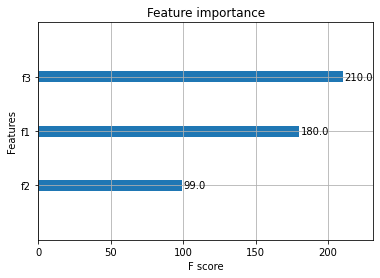

In [4]:
xgboost.plot_importance(xgb_model)

In [5]:
test_df = pd.read_csv('./vt_data/vt_test.csv')
test_y = full_df[['Vt']].to_numpy()
test_X = full_df[['W','L','T','Vds']].to_numpy()

In [6]:
predictions = xgb_model.predict(test_X)
predictions

array([9.9994725e-01, 6.0004443e-01, 6.0012454e-01, 6.0001171e-01,
       3.9999452e-01, 3.3170360e-04, 9.9994725e-01, 6.0004443e-01,
       6.0012454e-01, 6.0001171e-01, 3.9999452e-01, 3.3170360e-04,
       9.9978954e-01, 6.0017973e-01, 5.9974921e-01, 6.0004014e-01,
       4.0000618e-01, 3.6455781e-04, 9.9994725e-01, 8.0041170e-01,
       7.9832155e-01, 6.0091048e-01, 5.9993345e-01, 3.9993683e-01,
       9.9994725e-01, 8.0041170e-01, 7.9832155e-01, 6.0091048e-01,
       5.9993345e-01, 3.9993683e-01, 9.9993408e-01, 7.9829031e-01,
       6.0448688e-01, 5.9804773e-01, 5.9992176e-01, 3.9996248e-01,
       1.0001142e+00, 7.9990453e-01, 8.0026609e-01, 7.9985088e-01,
       6.0020626e-01, 5.9983683e-01, 1.0001142e+00, 7.9990453e-01,
       8.0026609e-01, 7.9985088e-01, 6.0020626e-01, 5.9983683e-01,
       9.9993408e-01, 8.0032158e-01, 7.9885697e-01, 8.0039138e-01,
       5.9952784e-01, 4.0092903e-01, 9.9984068e-01, 7.9995811e-01,
       8.0026609e-01, 7.9985088e-01, 6.0014117e-01, 6.0001957e

In [7]:
test_y.flatten()

array([ 1.0000e+00,  6.0000e-01,  6.0000e-01,  6.0000e-01,  4.0000e-01,
       -3.7581e-14,  1.0000e+00,  6.0000e-01,  6.0000e-01,  6.0000e-01,
        4.0000e-01, -3.7581e-14,  1.0000e+00,  6.0000e-01,  6.0000e-01,
        6.0000e-01,  4.0000e-01, -3.7581e-14,  1.0000e+00,  8.0000e-01,
        8.0000e-01,  6.0000e-01,  6.0000e-01,  4.0000e-01,  1.0000e+00,
        8.0000e-01,  8.0000e-01,  6.0000e-01,  6.0000e-01,  4.0000e-01,
        1.0000e+00,  8.0000e-01,  6.0000e-01,  6.0000e-01,  6.0000e-01,
        4.0000e-01,  1.0000e+00,  8.0000e-01,  8.0000e-01,  8.0000e-01,
        6.0000e-01,  6.0000e-01,  1.0000e+00,  8.0000e-01,  8.0000e-01,
        8.0000e-01,  6.0000e-01,  6.0000e-01,  1.0000e+00,  8.0000e-01,
        8.0000e-01,  8.0000e-01,  6.0000e-01,  4.0000e-01,  1.0000e+00,
        8.0000e-01,  8.0000e-01,  8.0000e-01,  6.0000e-01,  6.0000e-01,
        1.0000e+00,  8.0000e-01,  8.0000e-01,  8.0000e-01,  6.0000e-01,
        6.0000e-01,  1.2000e+00,  8.0000e-01,  8.0000e-01,  8.00

In [8]:
r_sq = xgb_model.score(full_X, full_y)
print(r_sq)
print(explained_variance_score(predictions, test_y))

0.9999894690396179
0.9999894564978083


In [9]:
xgb_model.save_model('./checkpoints/vt_xgboost.model')